## NRM regions

The most recent climate projections for Australia make extensive use of eight natural resource management (NRM) clusters, which can be further divided into X sub-clusters:  
https://www.climatechangeinaustralia.gov.au/en/overview/methodology/nrm-regions/

The edges of the shapefiles available for download at that CCiA website don't exactly match the coastline of Australia (see figures below), so here we use NRM shapefiles provided by the Bureau of Meteorology which match the coastline.

In [1]:
import geopandas as gp
from IPython.display import Image
import matplotlib.pyplot as plt

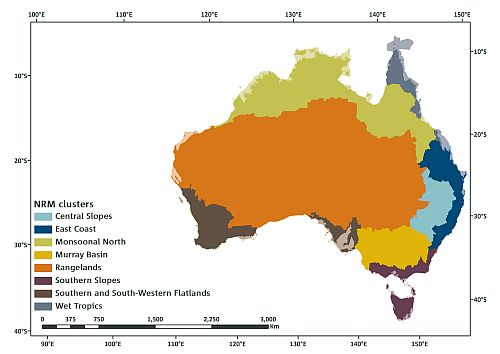

In [18]:
#https://www.climatechangeinaustralia.gov.au/media/ccia/2.2/cms_page_media/238/NRM_CCIA_clusters.jpg
Image(filename='figures/NRM_CCIA_clusters.jpg')

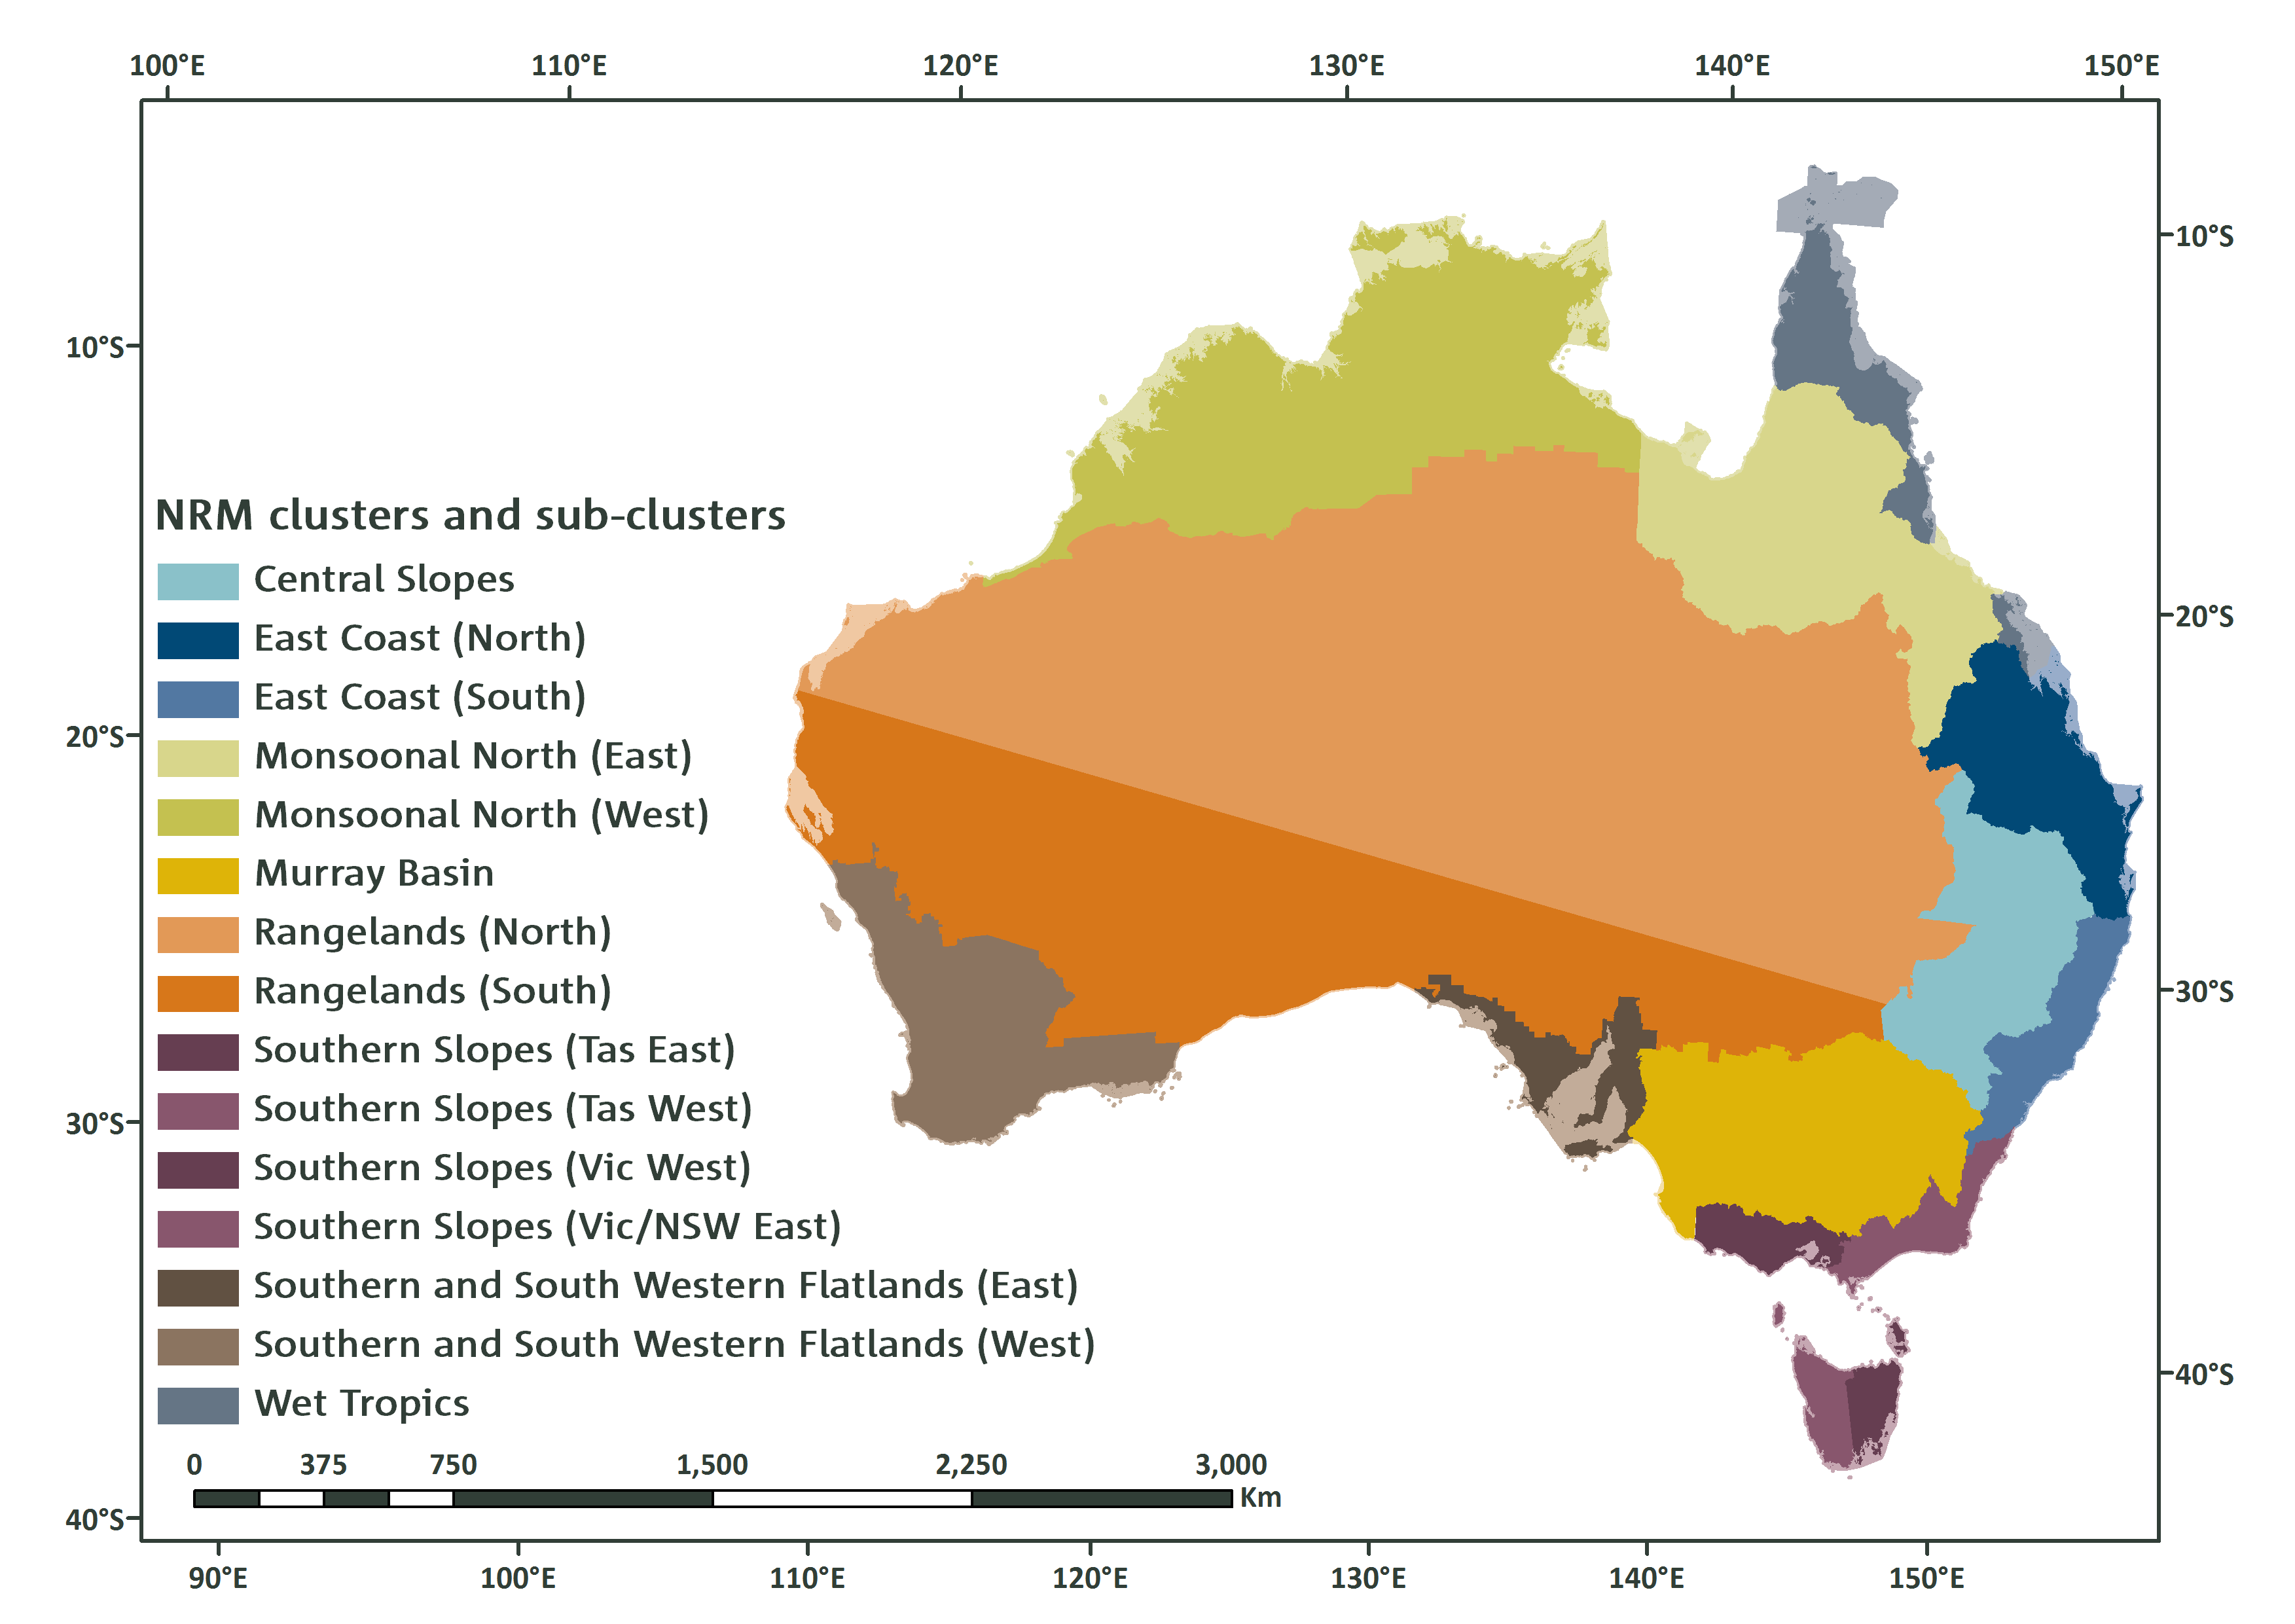

In [21]:
# https://www.climatechangeinaustralia.gov.au/media/ccia/2.2/cms_page_media/238/NRM_CCIA_sub_clusters.png
Image(filename='figures/NRM_CCIA_sub_clusters.png', width=500)

In [46]:
nrm_regions_file = 'NRM_regions_clipped_toAWRA/NRM_regions_clipped_toAWRA.shp'

In [47]:
nrm_regions = gp.read_file(nrm_regions_file)

In [48]:
nrm_regions = nrm_regions.drop(columns=['OBJECTID_1', 'OBJECTID', 'name'])
nrm_regions = nrm_regions.rename(columns={'C_code': 'cluster_code', 'C_Label': 'cluster_name'})

In [51]:
nrm_regions = nrm_regions[['label', 'code', 'cluster_name', 'cluster_code', 'Shape_Leng', 'Shape_Area', 'geometry']]

In [52]:
nrm_regions

,label,code,cluster_name,cluster_code,Shape_Leng,Shape_Area,geometry
0,Wet Tropics,WT,Wet Tropics,WT,47.359940,11.558749,"MULTIPOLYGON (((148.46142 -20.06680, 148.46219..."
1,Rangelands (North),RN,Rangelands,R,120.804567,246.454210,"MULTIPOLYGON (((114.17846 -21.80762, 114.18413..."
2,Monsoonal North (East),MNE,Monsoonal North,MN,52.186409,45.398870,"POLYGON ((146.29458 -18.89926, 146.29742 -18.9..."
3,Monsoonal North (West),MNW,Monsoonal North,MN,136.430799,66.770150,"POLYGON ((137.99467 -16.54112, 137.99491 -16.9..."
4,East Coast (South),ECS,East Coast,EC,31.172573,10.431254,"POLYGON ((153.53441 -28.17701, 153.53442 -28.1..."
5,Central Slopes,CS,Central Slopes,CS,43.872364,28.309947,"POLYGON ((147.95700 -24.87855, 147.95711 -24.8..."
6,Murray Basin,MB,Murray Basin,MB,45.958223,45.015106,"POLYGON ((145.74765 -32.21733, 145.75054 -32.2..."
7,Southern and South Western Flatlands (West),SSWFW,Southern and South Western Flatlands,SSWF,48.852434,33.449886,"POLYGON ((124.21316 -33.03955, 124.21087 -33.0..."
8,Southern and South Western Flatlands (East),SSWFE,Southern and South Western Flatlands,SSWF,52.487277,9.013641,"POLYGON ((139.35429 -33.09761, 139.35429 -33.0..."
9,Southern Slopes (Vic/NSW East),SSVE,Southern Slopes,SS,29.264342,6.877660,"POLYGON ((150.99392 -34.22148, 150.99430 -34.2..."


In [53]:
cluster_names = [
    'Central Slopes',
    'East Coast',
    'Monsoonal North',
    'Murray Basin',
    'Rangelands',
    'Southern Slopes',
    'Southern and South Western Flatlands',
    'Wet Tropics',
]
nrm_clusters = nrm_regions[nrm_regions['label'].isin(cluster_names)]

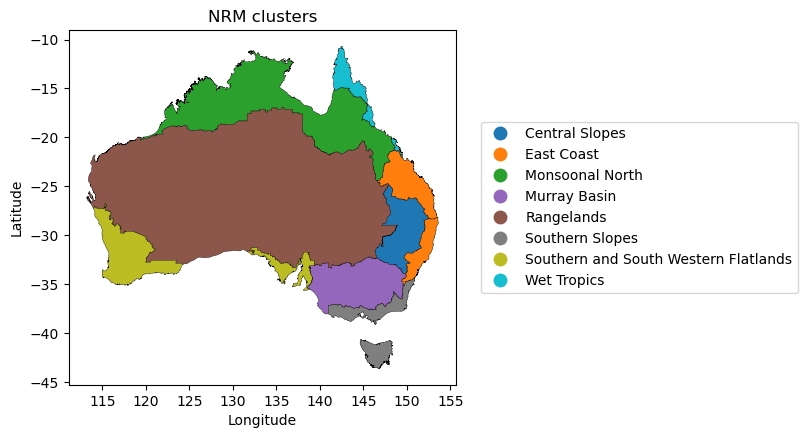

In [54]:
nrm_clusters.plot(
    figsize=[5, 5],
    column='label',
    cmap='tab10',
    legend=True,
    linewidth=0.25,
    edgecolor='black',
    legend_kwds={'loc': 'right', 'bbox_to_anchor': (1.9, 0.5)},
)
plt.title('NRM clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [55]:
nrm_sub_clusters = nrm_regions[0:15]

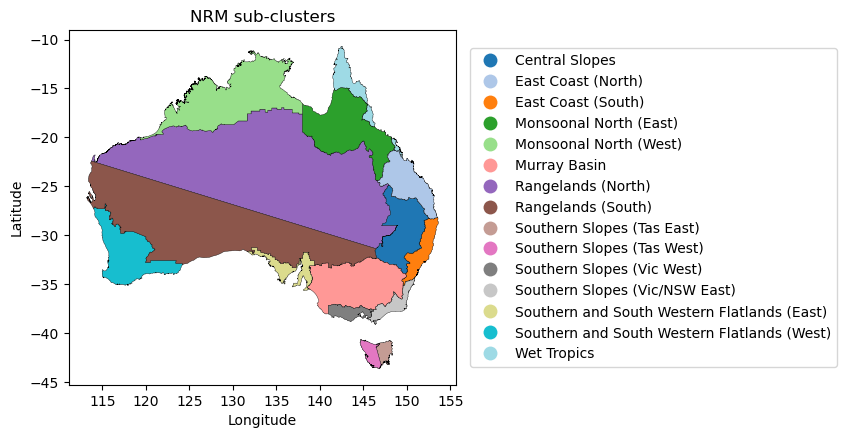

In [56]:
nrm_sub_clusters.plot(
    figsize=[5, 5],
    column='label',
    cmap='tab20',
    legend=True,
    linewidth=0.25,
    edgecolor='black',
    legend_kwds={'loc': 'right', 'bbox_to_anchor': (2.0, 0.5)},
)
plt.title('NRM sub-clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [57]:
nrm_sub_clusters

,label,code,cluster_name,cluster_code,Shape_Leng,Shape_Area,geometry
0,Wet Tropics,WT,Wet Tropics,WT,47.359940,11.558749,"MULTIPOLYGON (((148.46142 -20.06680, 148.46219..."
1,Rangelands (North),RN,Rangelands,R,120.804567,246.454210,"MULTIPOLYGON (((114.17846 -21.80762, 114.18413..."
2,Monsoonal North (East),MNE,Monsoonal North,MN,52.186409,45.398870,"POLYGON ((146.29458 -18.89926, 146.29742 -18.9..."
3,Monsoonal North (West),MNW,Monsoonal North,MN,136.430799,66.770150,"POLYGON ((137.99467 -16.54112, 137.99491 -16.9..."
4,East Coast (South),ECS,East Coast,EC,31.172573,10.431254,"POLYGON ((153.53441 -28.17701, 153.53442 -28.1..."
5,Central Slopes,CS,Central Slopes,CS,43.872364,28.309947,"POLYGON ((147.95700 -24.87855, 147.95711 -24.8..."
6,Murray Basin,MB,Murray Basin,MB,45.958223,45.015106,"POLYGON ((145.74765 -32.21733, 145.75054 -32.2..."
7,Southern and South Western Flatlands (West),SSWFW,Southern and South Western Flatlands,SSWF,48.852434,33.449886,"POLYGON ((124.21316 -33.03955, 124.21087 -33.0..."
8,Southern and South Western Flatlands (East),SSWFE,Southern and South Western Flatlands,SSWF,52.487277,9.013641,"POLYGON ((139.35429 -33.09761, 139.35429 -33.0..."
9,Southern Slopes (Vic/NSW East),SSVE,Southern Slopes,SS,29.264342,6.877660,"POLYGON ((150.99392 -34.22148, 150.99430 -34.2..."


In [58]:
nrm_sub_clusters.to_file('shapefiles_nrm_regions/nrm_regions.shp')

/Users/irv033/opt/anaconda3/envs/shapefiles/lib/python3.9/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/var/folders/6v/vrpsky6j509dff7250jyg8240000gp/T/ipykernel_12513/1569996858.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nrm_sub_clusters.to_file('shapefiles_nrm_regions/nrm_regions.shp')
